<a href="https://colab.research.google.com/github/Ronaldolvf/projetos/blob/main/Profissao_Analista_de_dados_(projeto)_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # Manipulação eficiente de arrays e cálculos matemáticos.
import pandas as pd  # Análise e manipulação de dados em DataFrame.
import seaborn as sns  # Visualização de dados estatísticos com gráficos.
import matplotlib.pyplot as plt  # Criação de gráficos personalizados.

from sklearn.linear_model import LinearRegression  # Modelo de regressão linear.
model = LinearRegression()  # Instância do modelo de regressão linear.
from sklearn.model_selection import train_test_split  # Divisão de dados em treinamento e teste.
from sklearn.metrics import r2_score  # Métrica R² para avaliação de desempenho do modelo.

# Coleta de dados

In [ ]:
# Efetuamos a leitura do arquivo CSV 'house_price_23.csv'.
df_price_23 = pd.read_csv('/content/house_price_23.csv', sep=',')

# Excluímos as linhas em que a coluna 'purpose' possui o valor 'For Rent'.
df_price_23 = df_price_23.drop(df_price_23[(df_price_23['property_type'] == 'Room')].index)


df_price_23.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,new_price
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,10000000
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,6900000
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,16500000
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,43500000
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,7000000


# Visualização dos dados


O valor (price) comesa em 15K e é finalizado em 44M.

In [ ]:
# Obtendo a quantidade de linhas e colunas presentes no DataFrame.

df_price_23.shape

(70935, 9)

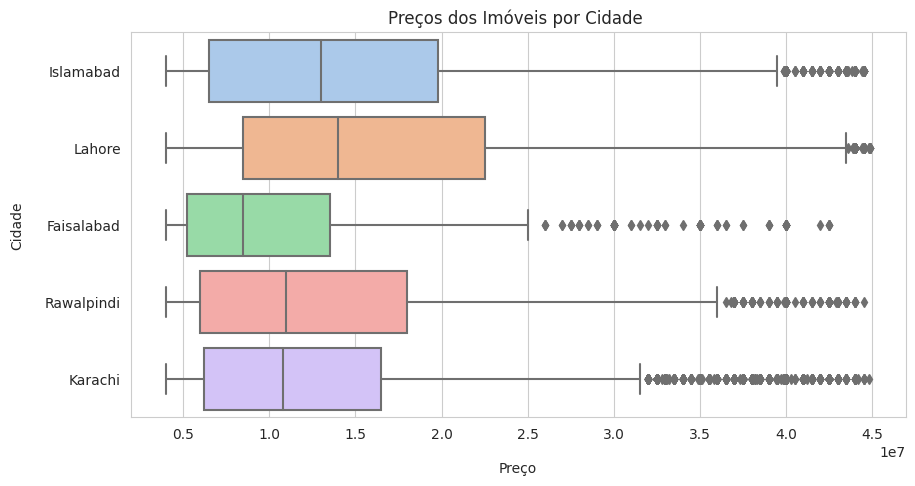

In [ ]:
# Configurando o estilo do gráfico e definindo o tamanho da figura
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))

    # Criando um boxplot para visualizar a relação
    grafico = sns.boxplot(data = df_price_23, x = 'new_price', y = 'city', palette="pastel")

    # Configurando título e rótulos dos eixos
    grafico.set(title='Preços dos Imóveis por Cidade ', xlabel = 'Preço', ylabel = 'Cidade')
    grafico.xaxis.labelpad = 15
    grafico.yaxis.labelpad = 15

No gráfico acima, podemos observar que a maioria dos imóveis apresenta preços concentrados na faixa de 500 mil a 2 milhões de reais, havendo algumas propriedades com valores que chegam até 4,5 milhões.

É possível identificar diferenças notáveis entre algumas cidades, como Faisalabad, que apresenta uma média de preços mais baixa em comparação com as demais.

 Por outro lado, Rawalpindi e Karachi são cidades com preços semelhantes, com foco na faixa de 500 mil a 1,5 milhão de reais, mas Rawalpindi tem preços maiores.

Enquanto isso, Islamabad e Lahore apresentam variações de preço bastante similares, sendo Lahore a cidade com os imóveis mais caros em em relação a outras cidades.

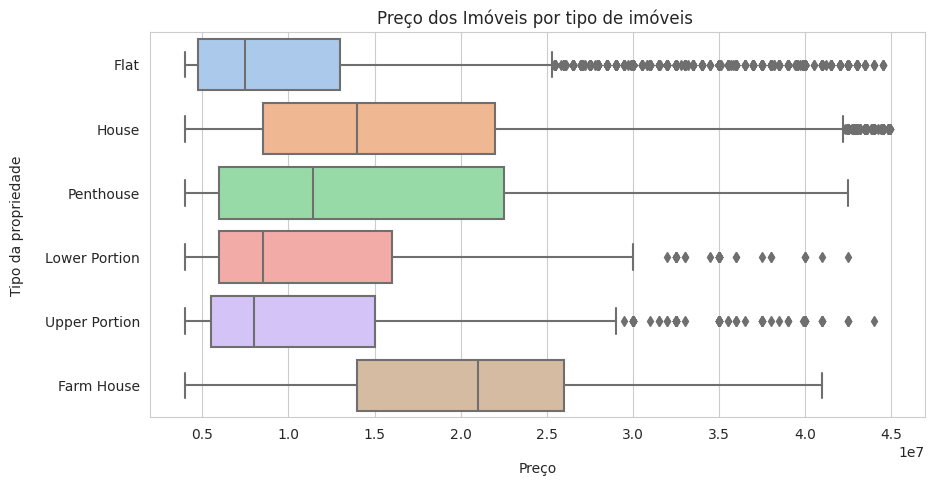

In [ ]:
# Configurando o estilo do gráfico e definindo o tamanho da figura
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))

    # Criando um boxplot para visualizar a relação abaixo.
    grafico = sns.boxplot(data = df_price_23, x = 'new_price', y = 'property_type', palette="pastel")

    # Configurando título e rótulos dos eixos
    grafico.set(title='Preço dos Imóveis por tipo de imóveis ', xlabel = 'Preço', ylabel = 'Tipo da propriedade')
    grafico.xaxis.labelpad = 15
    grafico.yaxis.labelpad = 15

No que diz respeito ao tipo de propriedade, podemos dividir em tres grupos distintos.

No primeiro grupo, incluem-se "Flat," "Lower Portion" e "Upper Portion,"" Observamos que esses tipos de propriedade têm sua concentração de preços na faixa de 500 mil a 1,5 milhão, sendo que os "Room" variam até 2,3 milhões.

No segundo grupo, temos "House" e "Penthouse," que apresentam sua concentração de preços entre 500 mil reais e até 2,3 milhões, sendo que as "Houses" tem valores que varian até 4,5 milhões e, portanto, podem ser considerados os tipos de imóveis com maior valor.

Por fim, as "Farm Houses" se destacam com uma concentração média de preços mais elevada em comparação com as outras categorias, iniciando em 1,3 milhão de reais e indo até 2,7 milhões. Tende a variar até 4,2 milhões.



<ipython-input-42-e02832ae4828>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  grafico = sns.catplot(data = df_price_23, x = 'Area_in_Marla', y = 'property_type', palette="pastel", height = 5, aspect=2)


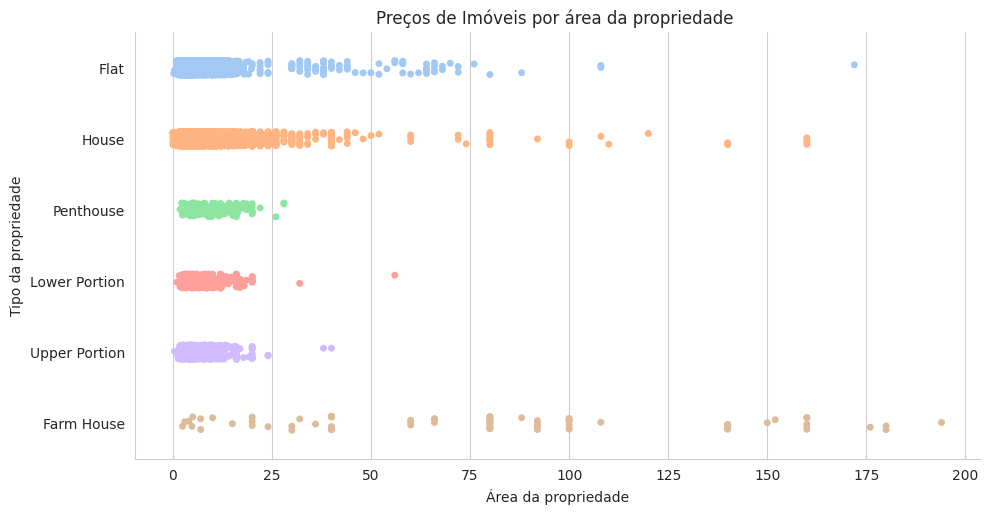

In [ ]:
# Configurando o estilo do gráfico e definindo o tamanho da figura
with sns.axes_style('whitegrid'):

    # Criando um catplot para visualizar a relação abaixo.
    grafico = sns.catplot(data = df_price_23, x = 'Area_in_Marla', y = 'property_type', palette="pastel", height = 5, aspect=2)

    # Configurando título e rótulos dos eixos
    grafico.set(title='Preços de Imóveis por área da propriedade ', xlabel = 'Área da propriedade', ylabel = 'Tipo da propriedade')

O gráfico abaixo representa a distribuição dos dados em relação ao 'Tipo de Propriedade' e à 'Área da Propriedade'.

Nele, podemos observar diferentes tipos de metragem. Para os tipos 'Penthouse', 'Lower Portion' e 'Upper Portion', notamos que eles apresentam metragens muito semelhantes, concentrando-se principalmente na faixa de 0 a 25.

Ao analisar os tipos 'Flat' e 'House', identificamos uma concentração maior na faixa de 0 a 25, que gradualmente se dilui, apresentando uma menor frequência acima de 50.

Por fim, o tipo 'Farm House' exibe uma variação mais ampla, abrangendo valores de até 200.

# Modelagem

In [ ]:
# Excluindo as colunas 'purpose', 'location', 'city', 'new_price'.

df_price_23 = df_price_23.drop(['purpose', 'location', 'city', 'new_price'], axis = 1)
df_price_23.head()

,property_type,price,baths,bedrooms,Area_in_Marla
0,Flat,10000000,2,2,4.0
1,Flat,6900000,3,3,5.6
2,House,16500000,6,5,8.0
3,House,43500000,4,4,40.0
4,House,7000000,3,3,8.0


In [ ]:
# Utilizando funções lambda para criar colunas binárias da coluna 'property_type'.

df_price_23['Farm_House'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Farm House' else 0 )
df_price_23['Flat'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Flat' else 0 )
df_price_23['House'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'House' else 0 )
df_price_23['Lower_Portion'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Lower Portion' else 0 )
df_price_23['Penthouse'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Penthouse' else 0 )
df_price_23['Upper_Portion'] = df_price_23['property_type'].apply(lambda x : 1 if x == 'Upper Portion' else 0 )

In [ ]:
# Excluindo a coluna 'property_type'.

df_price_23 = df_price_23.drop('property_type', axis = 1)
df_price_23.head()

,price,baths,bedrooms,Area_in_Marla,Farm_House,Flat,House,Lower_Portion,Penthouse,Upper_Portion
0,10000000,2,2,4.0,0,1,0,0,0,0
1,6900000,3,3,5.6,0,1,0,0,0,0
2,16500000,6,5,8.0,0,0,1,0,0,0
3,43500000,4,4,40.0,0,0,1,0,0,0
4,7000000,3,3,8.0,0,0,1,0,0,0


# Modelo de Regreção

In [ ]:
# Abaixo as colunas que serão utilizadas para o treinamento do modelo.
dados_para_treino = df_price_23[['baths', 'bedrooms', 'Area_in_Marla', 'Farm_House', 'Flat',	'House', 'Lower_Portion',	'Penthouse', 'Upper_Portion']]

# Input feitos no medelo para fazer as previsões.
baths	= 2
bedrooms = 2
Area_in_Marla = 75.0

Farm_House = 0
Flat	= 0
House	= 1
Lower_Portion = 0
Penthouse	= 0
Upper_Portion = 0

In [ ]:
def proj_price(a: np.array):

    # Dividindo os dados em conjuntos de treinamento e teste.
    predictors_train, predictors_test, target_train, target_test = train_test_split(
        dados_para_treino,
        df_price_23['price'],
        test_size = 0.25,
        random_state = 2811)

    # Treinando o modelo de regressão linear com os dados de treinamento.
    modelo = model.fit(predictors_train, target_train)

    # Realizando uma previsão com base nos valores fornecidos.
    peso = modelo.predict(a.reshape(1, -1))
    print(f'Predição: {(peso).round(2)}')

    # Usando o modelo para prever o conjunto de teste e calculando o coeficiente de determinação R².
    target_predicted = modelo.predict(predictors_test)
    r_squared = r2_score(target_test, target_predicted)
    print(f'R²: {(r_squared).round(2)} %')

    return

# Chamando a função.
proj_price(np.array([	baths,	bedrooms,	Area_in_Marla, Farm_House, Flat,	House,	Lower_Portion,	Penthouse,Upper_Portion]))

Predição: [62949335.06]
R²: 0.55 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
